Library & Data
[링크 텍스트](https://)

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
train = pd.read_csv('train.csv')# 모델 학습 파일
test = pd.read_csv('test.csv')# 모델 시험지 파일
submission = pd.read_csv('submission.csv')#답안지 파일

In [5]:
train.head()


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [6]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [7]:
submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


In [11]:
print(train.shape)
print(test.shape)
print(submission.shape)

(1459, 11)
(715, 10)
(715, 2)


pd.DataFrame.info() 함수
데이터셋의 column별 정보를 알려주는 함수
비어 있지 않은 값은 (non-null)은 몇개인지?
column의 type은 무엇인지?
type의 종류 : int(정수), float(실수), object(문자열), 등등 (date, ...)

기술통계량 종류

count: 해당 column에서 비어 있지 않은 값의 개수

mean: 평균

std: 표준편차

min: 최솟값 (이상치 포함)

25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값

50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)

75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값

max: 최댓값 (이상치 포함)

이상치: 울타리 밖에 있는 부분을 이상치라고 정의함
아래쪽 울타리: Q_1Q1​ - 1.5 * IQR1.5∗IQR
위쪽 울타리: Q_3Q3​ + 1.5 * IQR1.5∗IQR
IQRIQR = Q_3 - Q_1Q3​−Q1​

In [12]:
#pd.DataFrame.info()

train.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [16]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [17]:
train[['hour','count']].groupby('hour').mean()

,count
hour,
0,71.766667
1,47.606557
2,31.409836
3,21.377049
4,13.524590
5,13.114754
6,24.557377
7,62.360656
8,136.688525


In [18]:
import matplotlib.pyplot as plt

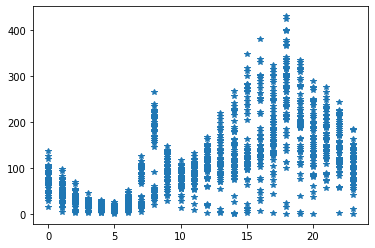

In [20]:
plt.plot('hour','count','*',data= train)

In [21]:
train.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

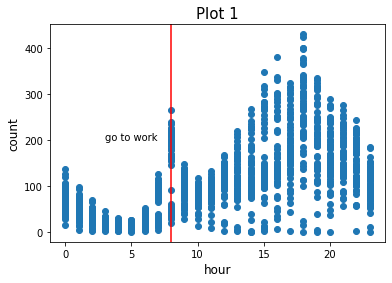

In [22]:
plt.title('Plot 1', fontsize = 15)
plt.plot('hour', 'count', 'o', data = train)
plt.xlabel('hour', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.axvline(8, color = 'red')
plt.text(3, 200, 'go to work', fontsize = 10)
plt.savefig('plot1.png')

상관계수

상관계수

1.두 개의 변수가 같이 일어나는 강도를 나타내는 수치

2.-1에서 1사이의 값을 지닙니다.
-1이나 1인 수치는 현실 세계에서 관측되기 힘든 수치입니다.

3.분야별로 기준을 정하는 것에 따라 달라지겠지만, 보통 0.4이상이면 두 개의 변수간에 상관성이 있다고 얘기합니다

In [23]:
#pd.DataFrame.corr()

train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


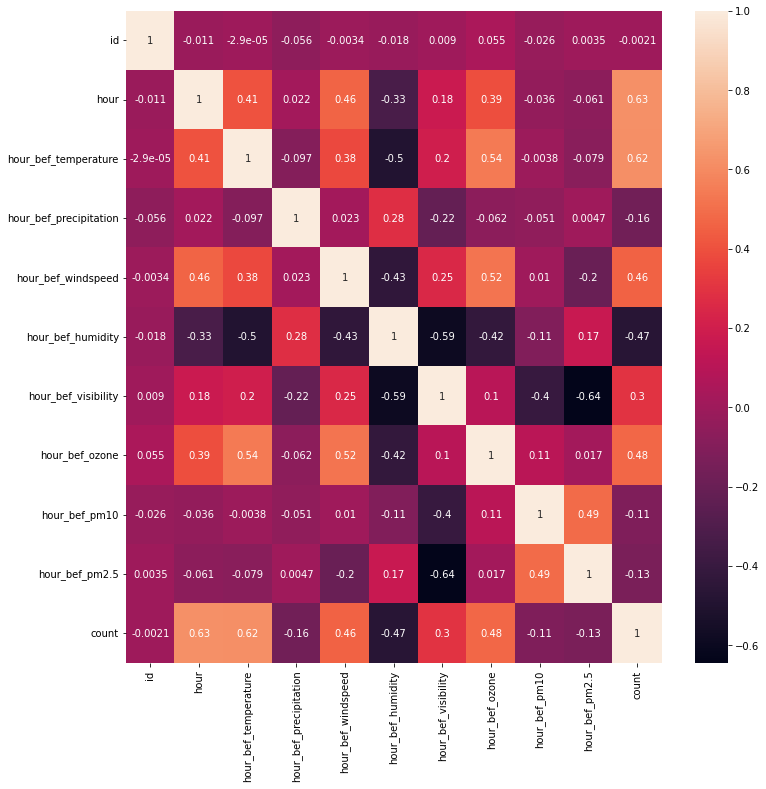

In [25]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(train.corr(),annot=True)

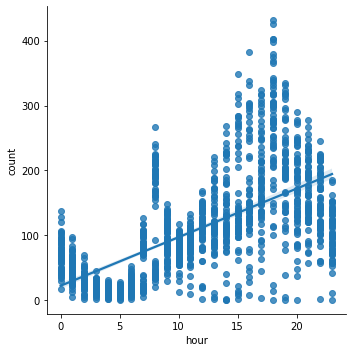

In [27]:
sns.lmplot(x='hour',y='count',data= train)

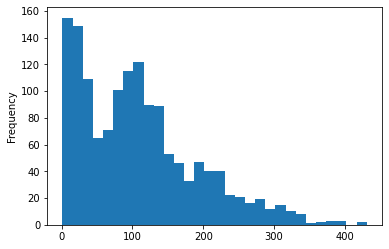

In [28]:
train['count'].plot(kind = 'hist', bins = 30)

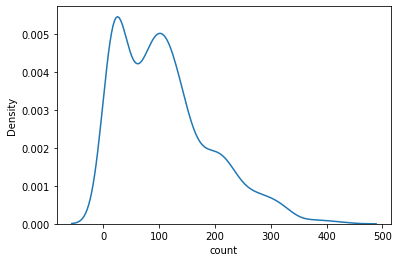

In [29]:
sns.kdeplot(train['count'])

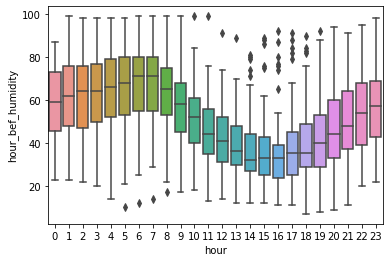

In [30]:
sns.boxplot(x = 'hour', y = 'hour_bef_humidity', data = train)

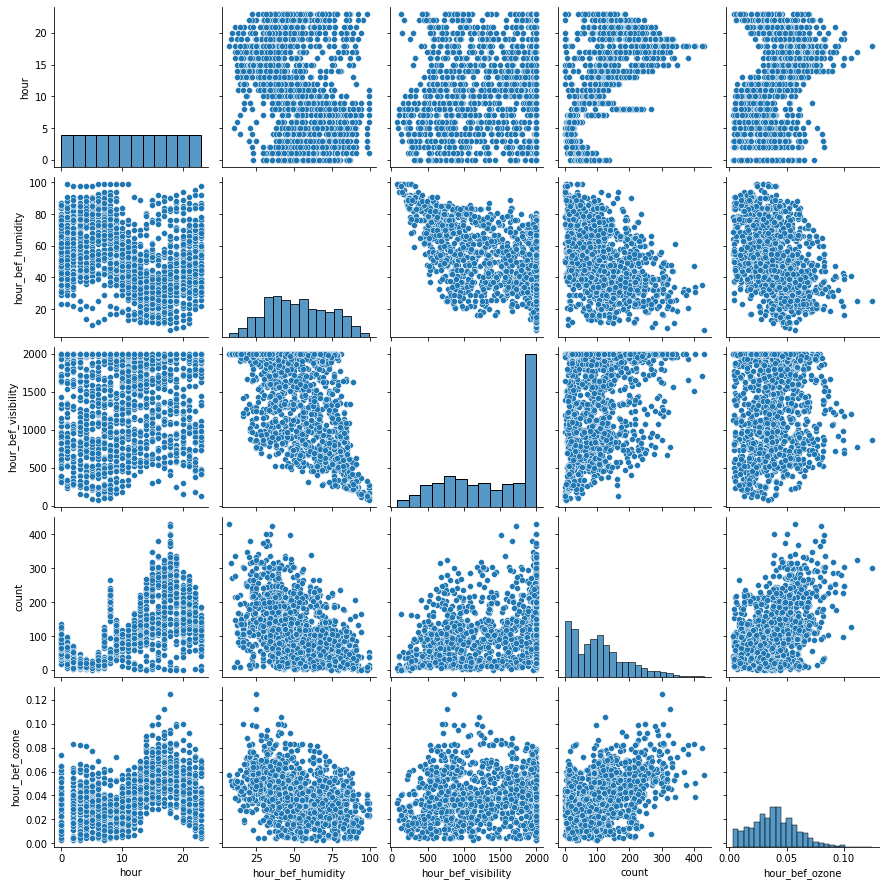

In [31]:
sns.pairplot(train[['hour', 'hour_bef_humidity', 'hour_bef_visibility', 'count', 'hour_bef_ozone']])

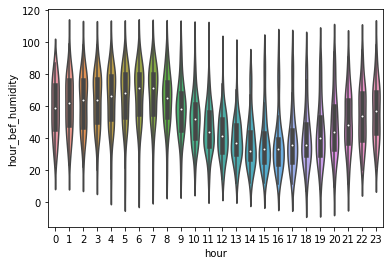

In [32]:
sns.violinplot(x = 'hour', y = 'hour_bef_humidity', data = train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


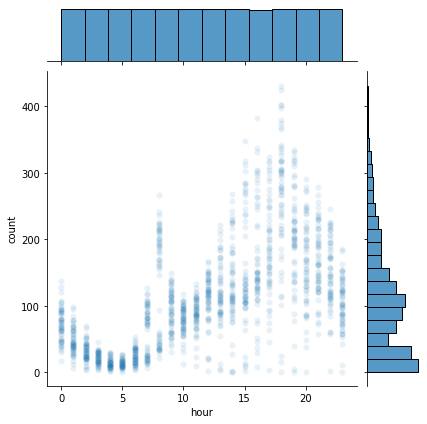

In [33]:
sns.jointplot('hour', 'count', data = train, alpha = 0.1)


# 데이터 전처리
Data Cleansing & Pre-Processing

# pd.Series.isna()

결측치 여부를 확인해줍니다.

결측치면 True, 아니면 False


In [34]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

# pd.DataFrame.fillna()

결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 합니다.

In [35]:
train['hour_bef_temperature'] = train['hour_bef_temperature'].fillna(value = train['hour_bef_temperature'].mean())

In [36]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [38]:
train_isna_sum = train.isna().sum()

train_isna_sum[train_isna_sum != 0].index

Index(['hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity',
       'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10',
       'hour_bef_pm2.5'],
      dtype='object')

In [39]:
na_columns = train_isna_sum[train_isna_sum != 0].index

In [40]:
def fill_bicycle_na(df, column) :
    
    df[column] = df[column].fillna(value = df[column].mean())

In [41]:
fill_bicycle_na(train, 'hour_bef_precipitation')

In [42]:
for col in na_columns:
    
    fill_bicycle_na(train, col)
    
    print(col, '결측값 대체 완료')


hour_bef_precipitation 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm2.5 결측값 대체 완료


In [44]:
test_isna_sum = test.isna().sum()

test_na_columns = test_isna_sum[test_isna_sum != 0].index

for col in test_na_columns:
    print(col)

hour_bef_temperature
hour_bef_precipitation
hour_bef_windspeed
hour_bef_humidity
hour_bef_visibility
hour_bef_ozone
hour_bef_pm10
hour_bef_pm2.5


In [45]:
for col in test_na_columns:
    fill_bicycle_na(test, col)
    print(col, '대체 완료')

hour_bef_temperature 대체 완료
hour_bef_precipitation 대체 완료
hour_bef_windspeed 대체 완료
hour_bef_humidity 대체 완료
hour_bef_visibility 대체 완료
hour_bef_ozone 대체 완료
hour_bef_pm10 대체 완료
hour_bef_pm2.5 대체 완료


In [46]:
test.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

# 4. 변수 선택 및 모델 구축

sklearn.neighbors.KNeighborsRegress

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [48]:
model = KNeighborsRegressor(n_jobs = -1)

In [66]:
column = ['hour', 'hour_bef_temperature']
X_train = train[column]
y_train = train['count']
X_test = test[column]
model.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

In [67]:
model_5 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 5)
model_7 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 7)
model_9 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 9)

In [68]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 10)


In [69]:
import numpy as np

np.mean(cross_val_score(model_5, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-2154.4346238290263

In [70]:
np.mean(cross_val_score(model_7, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-2059.3699019701085

In [56]:
np.mean(cross_val_score(model_9, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))


-1993.3584133742238

In [71]:
model_9.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                    weights='uniform')

In [74]:
#submission['count'] = model_9.predict(X_test)
#submission['count'] = model.predict(X_test)
#왜 오류가 뜨지....??

TypeError: ignored

In [75]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [76]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [77]:
X_train = train.drop(['id', 'count'], axis = 1)
y_train = train['count']
X_test = test.drop('id', axis = 1)

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
param = {'min_samples_split': [30, 50, 70],
        'max_depth': [5, 6, 7],
        'n_estimators': [50, 150, 250]}

In [80]:
param

{'max_depth': [5, 6, 7],
 'min_samples_split': [30, 50, 70],
 'n_estimators': [50, 150, 250]}

In [81]:
gs = GridSearchCV(estimator=model, param_grid=param, scoring = 'neg_mean_squared_error', cv = 3)

In [82]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [83]:
#submission['count'] = gs.predict(X_test)


TypeError: ignored

In [84]:
gs.best_params_


{'max_depth': 7, 'min_samples_split': 30, 'n_estimators': 250}

In [85]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.152731,0.006584,0.005955,0.000060,5,30,50,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2123.551005,-1783.362682,-1790.845285,-1899.252991,158.632062,15
1,0.443256,0.006290,0.013813,0.000156,5,30,150,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2099.746186,-1790.469430,-1750.938513,-1880.384710,155.949279,11
2,0.711218,0.003988,0.023344,0.001535,5,30,250,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2100.137057,-1783.701708,-1757.054125,-1880.297630,155.830150,10
3,0.142611,0.003177,0.006607,0.001061,5,50,50,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2162.611339,-1816.832116,-1793.525050,-1924.322835,168.763865,16
4,0.419880,0.007591,0.014139,0.000776,5,50,150,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2181.956494,-1830.672134,-1836.419964,-1949.682864,164.259021,18
5,0.697773,0.010281,0.023867,0.003360,5,50,250,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2186.285842,-1823.683430,-1812.804178,-1940.924483,173.553521,17
6,0.136305,0.001705,0.006435,0.001187,5,70,50,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2284.689046,-1941.868370,-1875.061107,-2033.872841,179.438716,27
7,0.400915,0.006470,0.013862,0.000175,5,70,150,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2286.160901,-1899.871011,-1852.740193,-2012.924035,194.163363,26
8,0.686616,0.027584,0.023794,0.003412,5,70,250,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2276.404547,-1900.070396,-1840.402975,-2005.625973,193.012655,24
9,0.159485,0.004949,0.006142,0.000090,6,30,50,"{'max_depth': 6, 'min_samples_split': 30, 'n_e...",-2018.385609,-1679.120024,-1795.827144,-1831.110926,140.733775,6


In [86]:
from sklearn.model_selection import RandomizedSearchCV

In [87]:
param = {'min_samples_split': range(30, 70),
        'max_depth': [5, 6, 7],
        'n_estimators': range(50, 250)}

In [88]:
model = RandomForestRegressor()

In [90]:
rs = RandomizedSearchCV(estimator=model, param_distributions=param, n_iter = 30, random_state=0, scoring = 'neg_mean_squared_error', n_jobs = -1)

rs.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [91]:
model_100 = RandomForestRegressor(n_estimators=100, n_jobs = -1, random_state=10)
model_200 = RandomForestRegressor(n_estimators=200, n_jobs = -1, random_state=10)
model_300 = RandomForestRegressor(n_estimators=300, n_jobs = -1, random_state=10)
model_500 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10)


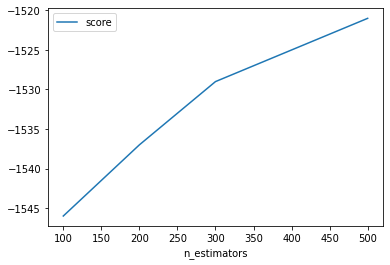

In [92]:
pd.DataFrame({'n_estimators':[100, 200, 300, 500], 'score':[-1546, -1537, -1529, -1521]}).plot('n_estimators', 'score')


In [96]:
%%time
score = cross_val_score(model_100, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

score = cross_val_score(model_200, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

score = cross_val_score(model_300, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

score = cross_val_score(model_500, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))



-1546.8865621858963
-1537.2335820896296
-1529.93820386781
-1521.7993785402248
CPU times: user 8.2 s, sys: 713 ms, total: 8.91 s
Wall time: 32.3 s


In [97]:
model_sam_30 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30)
model_sam_50 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=50)
model_sam_100 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=100)


In [98]:
%%time
score = cross_val_score(model_sam_30, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

score = cross_val_score(model_sam_50, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

score = cross_val_score(model_sam_100, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1647.5599150463906
-1746.5733867422455
-2009.2340561302196
CPU times: user 9.26 s, sys: 602 ms, total: 9.86 s
Wall time: 27.4 s


In [100]:
final_model = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30)
final_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=30, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [101]:
rf_maxf_02 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30, max_features=0.2)
rf_maxf_04 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30, max_features=0.4)
rf_maxf_06 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30, max_features=0.6)
rf_maxf_08 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30, max_features=0.8)

In [102]:
%%time
score = cross_val_score(rf_maxf_02, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

score = cross_val_score(rf_maxf_04, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

score = cross_val_score(rf_maxf_06, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

score = cross_val_score(rf_maxf_08, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-2253.430187736337
-1830.923118087825
-1714.0867530230257
-1673.787363204249
CPU times: user 11.8 s, sys: 749 ms, total: 12.6 s
Wall time: 29.6 s


In [104]:
from sklearn.model_selection import train_test_split

X_trn, X_val, y_trn, y_val = train_test_split(X_train, y_train, test_size = 0.25, shuffle = True, random_state = 10)

X_trn.shape, X_val.shape, y_trn.shape, y_val.shape


((1094, 9), (365, 9), (1094,), (365,))

In [105]:
from sklearn.model_selection import KFold

# KFold(n_splits= , shuffle= , random_state= 1)

n_splits: 몇 폴드로 데이터를 분할할지 결정합니다

shuffle: 데이터를 셔플할지 여부를 결정합니다

random_state: 재현을 위해 시드값을 고정합니다


In [106]:
kfolds = KFold(n_splits=10, shuffle = True, random_state=10)